In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/crime_data (1).csv')

In [3]:
df.columns

Index(['State', 'VR', 'MR', 'M', 'W', 'H', 'P', 'S'], dtype='object')

## 1. Grafica cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula.

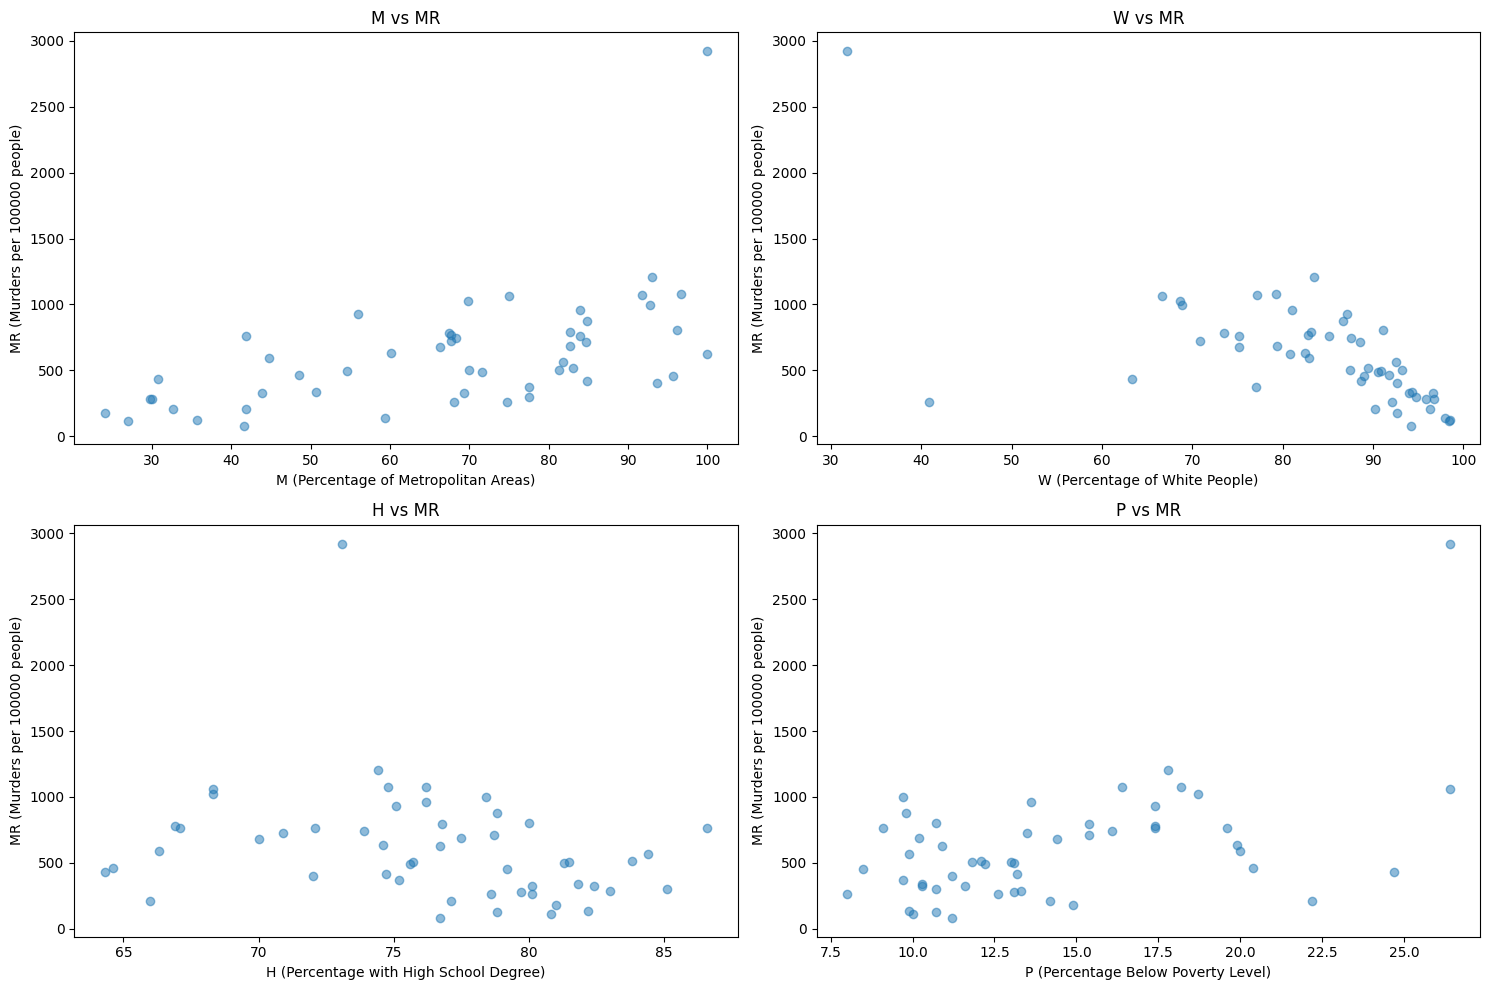

In [4]:
# MR = asesinatos por cada 100000 habitantes
# M = porcentaje de áreas metropolitanas
# W = porcentaje de gente blanca
# H = porcentaje de personas con preparatoria terminada
# P = porcentaje con ingresos por debajo del nivel de pobreza

VR = df['VR']
M = df['M']
W = df['W']
H = df['H']
P = df['P']

plt.figure(figsize=(15, 10))



# Variable M
plt.subplot(221)
plt.scatter(M, VR, alpha=0.5)
plt.xlabel('M (Percentage of Metropolitan Areas)')
plt.ylabel('MR (Murders per 100000 people)')
plt.title('M vs MR')

# Variable W
plt.subplot(222)
plt.scatter(W, VR, alpha=0.5)
plt.xlabel('W (Percentage of White People)')
plt.ylabel('MR (Murders per 100000 people)')
plt.title('W vs MR')

# Variable H
plt.subplot(223)
plt.scatter(H, VR, alpha=0.5)
plt.xlabel('H (Percentage with High School Degree)')
plt.ylabel('MR (Murders per 100000 people)')
plt.title('H vs MR')

# Variable P
plt.subplot(224)
plt.scatter(P, VR, alpha=0.5)
plt.xlabel('P (Percentage Below Poverty Level)')
plt.ylabel('MR (Murders per 100000 people)')
plt.title('P vs MR')


plt.tight_layout()
plt.show()

In [16]:
df = df.iloc[:, 2:-1]
df.head()

,MR,M,W,H,P
0,9.0,41.8,75.2,86.6,9.1
1,11.6,67.4,73.5,66.9,17.4
2,10.2,44.7,82.9,66.3,20.0
3,8.6,84.7,88.6,78.7,15.4
4,13.1,96.7,79.3,76.2,18.2


In [17]:
y = df.iloc[:, 0]
x = df.iloc[:, 1:5]


In [ ]:
x.head()

## 2. Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal, y obtenga con ella el modelo que corresponde a la variable de respuesta y las variables predictoras asignadas a tu número de matrícula.

In [20]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

regr = linear_model.LinearRegression()
regr.fit(x, y)
print("Model coefficients: ", regr.coef_)
print("Model intercept: ", regr.intercept_)
y_pred = regr.predict(x)
print('MSE: ', mean_squared_error(y, y_pred))
print("MAE: ", mean_absolute_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))


Model coefficients:  [ 0.08937732 -0.41776537  0.72531944  1.5371259 ]
Model intercept:  -39.36237505378308
MSE:  35.303326150777515
MAE:  3.7156277068886543
R^2:  0.6865107390948453


## 3. Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R2, MSE y MAE.

In [22]:
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True)
mse_cv = []
mae_cv = []
r2_cv = []

for train_index, test_index in kf.split(x):
    # Training phase
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    regr_cv = linear_model.LinearRegression()
    regr_cv.fit(x_train, y_train)

    # Test phase
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    y_pred = regr_cv.predict(x_test)

    # Calculate MSE, MAE and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)
    mse_cv.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    print('mae = ', mae_i)
    mae_cv.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    print('r^2= ', r2_i)
    r2_cv.append(r2_i)

print('MSE:', np.average(mse_cv), ' MAE:', np.average(mae_cv), ' R^2:',
      np.average(r2_cv))


mse =  110.7653991267549
mae =  6.197218087058209
r^2=  -3.084742892512158
mse =  19.659231721640616
mae =  3.6914004692819304
r^2=  -0.18967326408272434
mse =  14.095188125172953
mae =  2.941808703823097
r^2=  -0.6098483399393475
mse =  20.719278912964487
mae =  4.017624644757493
r^2=  -0.4566422182905294
mse =  296.4631990728499
mae =  7.109080462049508
r^2=  0.3457044766810148
MSE: 92.34045939187656  MAE: 4.791426473394048  R^2: -0.7990404476287488


## 4. Utiliza el método de validación cruzada asignado a tu matrícula para mostrar los histogramas de R2 (sólo si es el método de Monte Carlo), MSE y MAE.

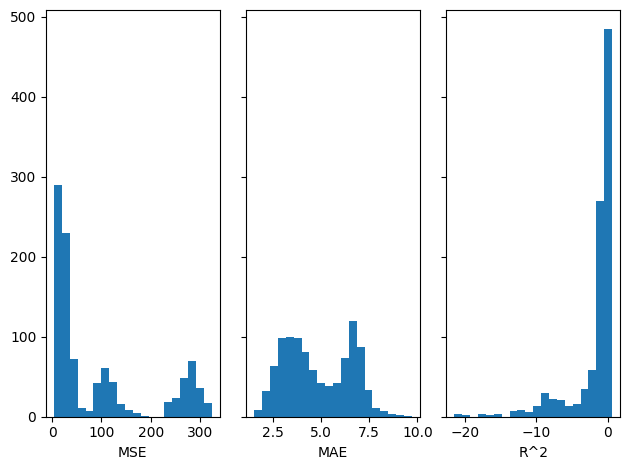

In [23]:
# Find histograms of MSE, MAE, and R^2 using Shuffle Split (Monte Carlo)
kf = ShuffleSplit(n_splits=1000, test_size=0.2)
mse_cv = []
mae_cv = []
r2_cv = []

for train_index, test_index in kf.split(x):
    # Training phase
    x_train = x.iloc[train_index, :]
    y_train = y.iloc[train_index]
    regr_cv = linear_model.LinearRegression()
    regr_cv.fit(x_train, y_train)

    # Test phase
    x_test = x.iloc[test_index, :]
    y_test = y.iloc[test_index]
    y_pred = regr_cv.predict(x_test)

    # Calculate MSE, MAE, and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].hist(mse_cv, bins=20)
axs[0].set_xlabel("MSE")
axs[1].hist(mae_cv, bins=20)
axs[1].set_xlabel("MAE")
axs[2].hist(r2_cv, bins=20)
axs[2].set_xlabel("R^2")
plt.show()


Creamos variables cuadradas

In [ ]:
import pandas as pd
import numpy as np

# Definir las variables originales
x_variables = ['M', 'W', 'H', 'P']

# Extraer las variables predictoras y la variable de respuesta
X = df[x_variables].values
y = df['MR'].values

# Agregar las variables al cuadrado
X_squared = X ** 2

# Extender la lista de nombres x_variables con los nombres de las variables al cuadrado
x_squared_variable_names = [variable + '_squared' for variable in x_variables]
x_variables.extend(x_squared_variable_names)

# Combinar X y X_squared
X = np.column_stack((X, X_squared))

# Comparar 'M' con 'M_squared'
comparison_df = pd.DataFrame({'M': X[:, x_variables.index('M')], 'M_squared': X[:, x_variables.index('M_squared')]})

print(comparison_df.head())


      M  M_squared
0  41.8    1747.24
1  67.4    4542.76
2  44.7    1998.09
3  84.7    7174.09
4  96.7    9350.89


Creamos los productos entre pares de variables

In [ ]:
# Agregar interacciones solo entre las variables originales
new_variable_names = []

num_predictors = X.shape[1]
num_original_variables = len(x_variables)

for i in range(num_original_variables):
    for j in range(i + 1, num_original_variables):
        # Verificar que ambas variables involucradas en la interacción sean originales
        if (x_variables[i] in x_variables[:4]) and (x_variables[j] in x_variables[:4]):
            interaction_term = X[:, i] * X[:, j]
            interaction_term_name = x_variables[i] + 'x' + x_variables[j]
            X = np.column_stack((X, interaction_term))
            new_variable_names.append(interaction_term_name)

# Extender x_variables con las variables al cuadrado
x_variables.extend(new_variable_names)

In [ ]:
x_variables

['M',
 'W',
 'H',
 'P',
 'M_squared',
 'W_squared',
 'H_squared',
 'P_squared',
 'MxW',
 'MxH',
 'MxP',
 'WxH',
 'WxP',
 'HxP']

comprobamos que si estan correctamente las variables calculadas y guardadas en el lugar correcto

In [ ]:
# Crear un DataFrame con las variables originales
variables_originales = df[['M', 'W', 'H', 'P']]

# Crear un DataFrame con las variables de interacción calculadas previamente en X
variables_interaccion_calculadas = pd.DataFrame(X[:, -len(new_variable_names):], columns=new_variable_names)

# Calcular manualmente las variables de interacción esperadas
variables_interaccion_manual = pd.DataFrame({
    'MxW_calculada': variables_originales['M'] * variables_originales['W'],
    'MxH_calculada': variables_originales['M'] * variables_originales['H'],
    'MxP_calculada': variables_originales['M'] * variables_originales['P'],
    'WxH_calculada': variables_originales['W'] * variables_originales['H'],
    'WxP_calculada': variables_originales['W'] * variables_originales['P'],
    'HxP_calculada': variables_originales['H'] * variables_originales['P']
})

# Mostrar la tabla de comparación
comparison_table = pd.concat([variables_interaccion_manual, variables_interaccion_calculadas], axis=1)
comparison_table.head()

,MxW_calculada,MxH_calculada,MxP_calculada,WxH_calculada,WxP_calculada,HxP_calculada,MxW,MxH,MxP,WxH,WxP,HxP
0,3143.36,3619.88,380.38,6512.32,684.32,788.06,3143.36,3619.88,380.38,6512.32,684.32,788.06
1,4953.90,4509.06,1172.76,4917.15,1278.90,1164.06,4953.90,4509.06,1172.76,4917.15,1278.90,1164.06
2,3705.63,2963.61,894.00,5496.27,1658.00,1326.00,3705.63,2963.61,894.00,5496.27,1658.00,1326.00
3,7504.42,6665.89,1304.38,6972.82,1364.44,1211.98,7504.42,6665.89,1304.38,6972.82,1364.44,1211.98
4,7668.31,7368.54,1759.94,6042.66,1443.26,1386.84,7668.31,7368.54,1759.94,6042.66,1443.26,1386.84


In [ ]:
x_variables

['M',
 'W',
 'H',
 'P',
 'M_squared',
 'W_squared',
 'H_squared',
 'P_squared',
 'MxW',
 'MxH',
 'MxP',
 'WxH',
 'WxP',
 'HxP']

In [ ]:
# Asegurarnos que estamosusando el indice correcto
data = {}
data['M'] = X[:, x_variables.index('M')]  # Variable 'M'
index_M = x_variables.index('M')
data['M_squared'] = X[:, index_M + 4]  # Variable 'M_squared'

# Crear un DataFrame para comparar 'M' con 'M_squared'
df_comparison = pd.DataFrame(data)

# Imprimir las primeras filas del DataFrame
print(df_comparison.head())

      M  M_squared
0  41.8    1747.24
1  67.4    4542.76
2  44.7    1998.09
3  84.7    7174.09
4  96.7    9350.89


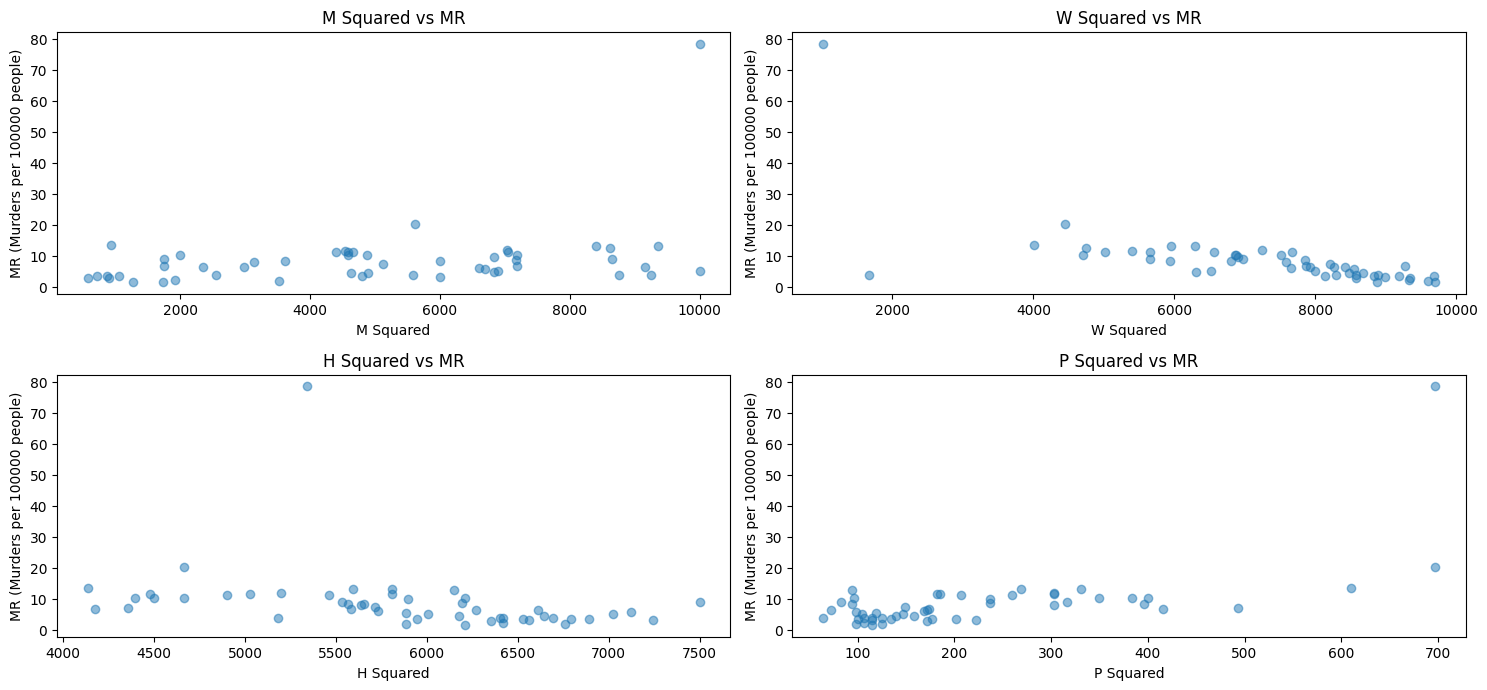

In [ ]:
# encontrar el index de cada variable
index_M = x_variables.index('M')
index_W = x_variables.index('W')
index_H = x_variables.index('H')
index_P = x_variables.index('P')

# acceder las columnas correspondientes con el index
X_M_squared = X[:, index_M + 4]
X_W_squared = X[:, index_W + 4]
X_H_squared = X[:, index_H + 4]
X_P_squared = X[:, index_P + 4]

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(321)
plt.scatter(X_M_squared, MR, alpha=0.5)
plt.xlabel('M Squared')
plt.ylabel('MR (Murders per 100000 people)')
plt.title('M Squared vs MR')

plt.subplot(322)
plt.scatter(X_W_squared, MR, alpha=0.5)
plt.xlabel('W Squared')
plt.ylabel('MR (Murders per 100000 people)')
plt.title('W Squared vs MR')

plt.subplot(323)
plt.scatter(X_H_squared, MR, alpha=0.5)
plt.xlabel('H Squared')
plt.ylabel('MR (Murders per 100000 people)')
plt.title('H Squared vs MR')

plt.subplot(324)
plt.scatter(X_P_squared, MR, alpha=0.5)
plt.xlabel('P Squared')
plt.ylabel('MR (Murders per 100000 people)')
plt.title('P Squared vs MR')

plt.tight_layout()
plt.show()

In [ ]:
X

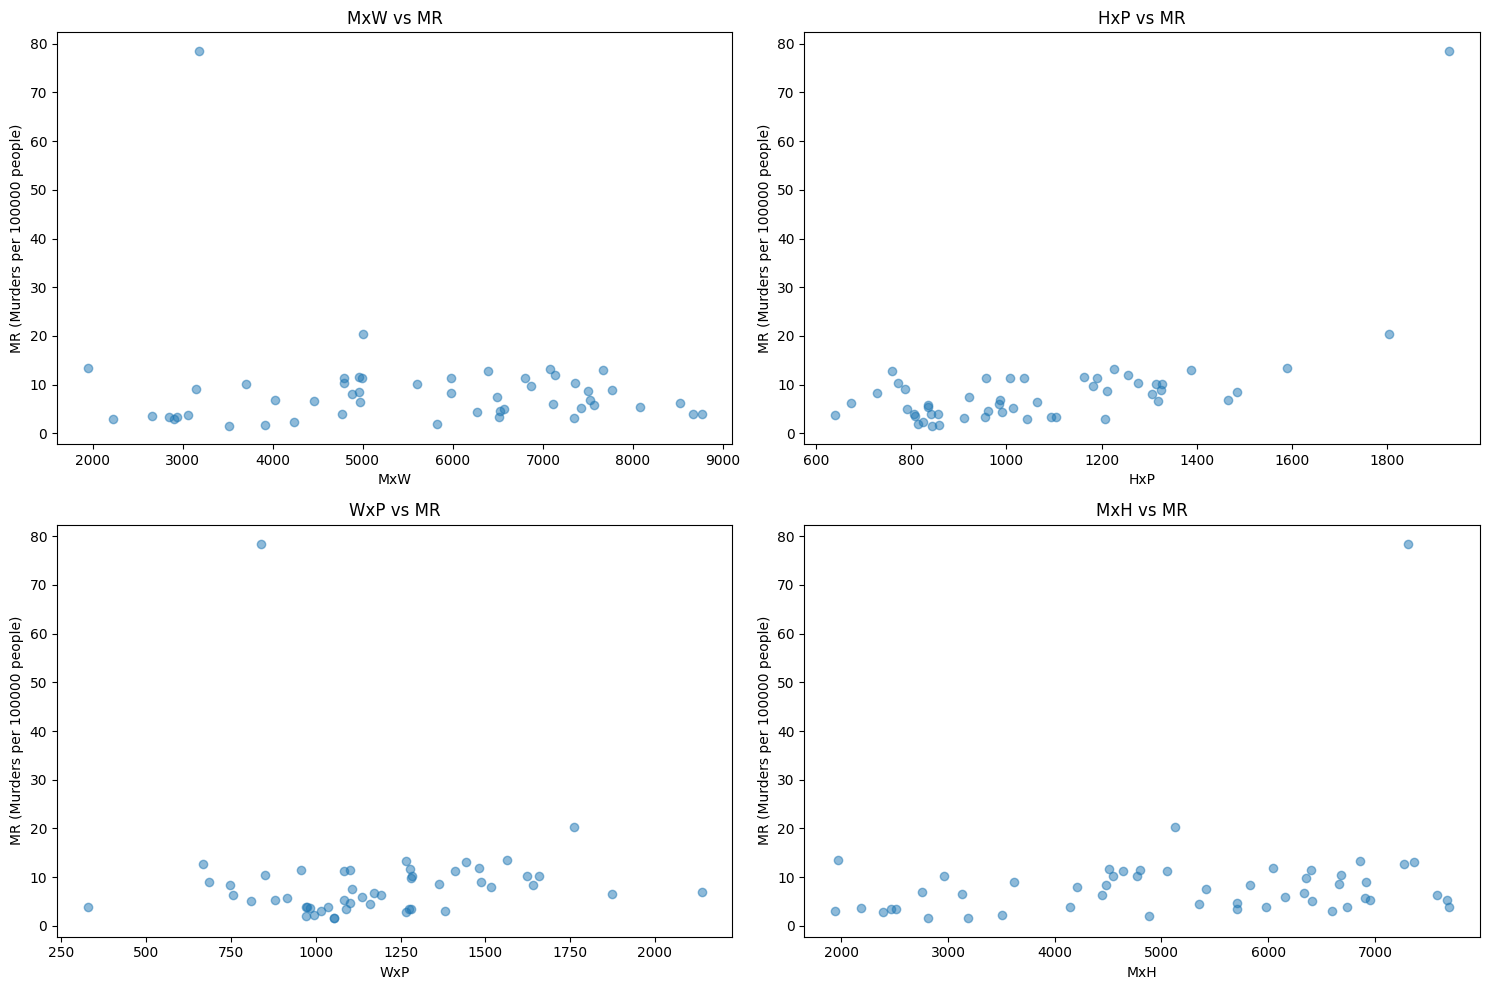

In [ ]:
# Crear scatter plots pare algunas variables de producto entre pares de variables
selected_interaction_terms = ['MxW', 'HxP', 'WxP', 'MxH']

plt.figure(figsize=(15, 10))

for term_name in selected_interaction_terms:
    # Verificar si el término de interacción está en x_variables
    if term_name in x_variables:
        term_index = x_variables.index(term_name)
        term_values = X[:, term_index]

        plt.subplot(2, 2, selected_interaction_terms.index(term_name) + 1)
        plt.scatter(term_values, MR, alpha=0.5)
        plt.xlabel(f'{term_name}')
        plt.ylabel('MR (Murders per 100000 people)')
        plt.title(f'{term_name} vs MR')

plt.tight_layout()
plt.show()

In [ ]:
x_variables

['M',
 'W',
 'H',
 'P',
 'M_squared',
 'W_squared',
 'H_squared',
 'P_squared',
 'MxW',
 'MxH',
 'MxP',
 'WxH',
 'WxP',
 'HxP']

In [ ]:
# Eliminar las columnas 'State' y 'VR'
df = df.drop(['State', 'VR', 'S'], axis=1)

# Crear un DataFrame con las columnas adecuadas
column_names = ['M_squared', 'W_squared', 'H_squared', 'P_squared',
                'MxW', 'MxH', 'MxP', 'WxH', 'WxP', 'HxP']

# Tomar solo las primeras 10 columnas de X que coinciden con las especificadas en column_names
X_df = pd.DataFrame(X[:, :10], columns=column_names)

# Concatenar las columnas de X_df a df
df = pd.concat([df, X_df], axis=1)
df.columns

Index(['MR', 'M', 'W', 'H', 'P', 'M_squared', 'W_squared', 'H_squared',
       'P_squared', 'MxW', 'MxH', 'MxP', 'WxH', 'WxP', 'HxP'],
      dtype='object')

In [ ]:
# Obtener las variables predictoras (X) y la variable de respuesta (y)
X = df.iloc[:, 1:5].values   # Excluir la primera columna (MR) como variable de respuesta
y = df['MR'].values

from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Estandarizar las variables predictoras
X_scaled = scaler.fit_transform(X)

# Agregar una columna de unos a la matriz X para el término independiente
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]  # Usar X_scaled en lugar de X

# Calcular los coeficientes usando la fórmula de mínimos cuadrados
coefficients = np.linalg.inv(X_scaled.T @ X_scaled) @ X_scaled.T @ y  # Usar X_scaled en lugar de X

# Los coeficientes[0] es el término independiente, y los coeficientes restantes son para las variables predictoras
intercept = coefficients[0]
predictor_coefficients = coefficients[1:]

# Imprimir los coeficientes
print("Intercept (Término Independiente):", intercept)
print("Coeficientes de las variables predictoras:", predictor_coefficients)

# Crear el modelo de regresión lineal
def linear_regression_model(X, coefficients, intercept):
    return X.dot(coefficients) + intercept

# Obtener el modelo
modelo = linear_regression_model(X_scaled, coefficients, intercept)  # Usar X_scaled en lugar de X


Intercept (Término Independiente): 8.727450980392154
Coeficientes de las variables predictoras: [ 1.9431346  -5.48200634  4.01608726  6.97713052]


aqui no pude hacer el modelo con mas de 5 variables independientes porque usando mas de 5 la matriz es singular, osea que no tiene inversa. Podemos estandarizar datos, (que ya se hizo), eliminar variables o simplemente hacer un modelo diferente. En este caso vamos a intentar hacer otro modelo. (modelo de regresión de Ridge)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

X = df.drop(columns=['MR']).values
y = df['MR'].values

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión de Ridge
ridge = Ridge(alpha=1.0)  # Puedes ajustar el hiperparámetro alpha según sea necesario

# Ajustar el modelo a los datos de entrenamiento
ridge.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = ridge.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Coeficientes:", ridge.coef_)
print("Intercepto:", ridge.intercept_)
print("R^2:", r2)
print("MSE:", mse)
print("MAE:", mae)

Coeficientes: [ 2.9450004  -2.32268057  1.09687412  0.1318043   2.9450004  -2.32268057
  1.09687412  0.1318043   4.06426475  4.23207869  0.64041504  7.47062027
 -7.99515045  0.38570306]
Intercepto: 9.300889341113354
R^2: -0.27444371511196697
MSE: 32.90403020565361
MAE: 4.153904809150356


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Especifica el número de pliegues (k)
k = 5

# Inicializa las listas para almacenar las métricas
r2_scores = []
mse_scores = []
mae_scores = []

# Crea un objeto KFold para dividir los datos en k pliegues
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Itera a través de los pliegues
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Inicializa y ajusta el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcula las métricas de evaluación
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Agrega las métricas a las listas
    r2_scores.append(r2)
    mse_scores.append(mse)
    mae_scores.append(mae)

# Calcula el promedio de las métricas de evaluación
avg_r2 = sum(r2_scores) / k
avg_mse = sum(mse_scores) / k
avg_mae = sum(mae_scores) / k

# Imprime las métricas promedio
print(f"R^2 promedio: {avg_r2}")
print(f"MSE promedio: {avg_mse}")
print(f"MAE promedio: {avg_mae}")

R^2 promedio: -0.5151943788569688
MSE promedio: 75.38531625314504
MAE promedio: 4.548306170565374


El R^2 promedio es aproximadamente -0.515, lo que sugiere que el modelo de regresión lineal no se ajusta bien a los datos.

El MSE promedio es 75.385, lo que indica que el modelo tiene un error cuadrático medio relativamente alto en la predicción de la variable de respuesta.

El MAE promedio es aproximadamente 4.548, lo que representa el error absoluto medio en las predicciones del modelo.

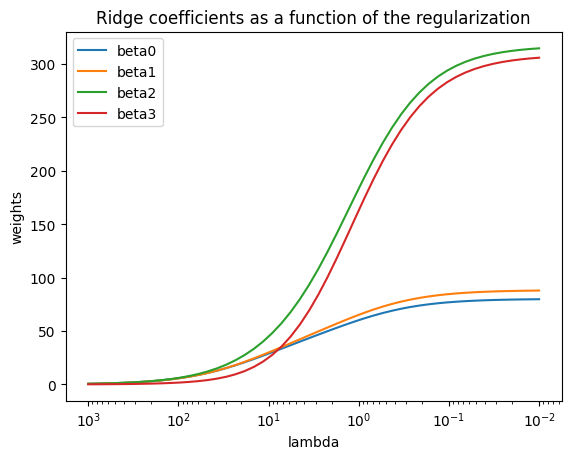

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

x_variables = ['M', 'W', 'H', 'P']
y_variable = 'MR'

# NUMPY ARRAYS
X = df[x_variables].values
y = df[y_variable].values

# Error function (it evaluates the mean squared error function for the specified model and data set).
def mse(X, y, beta):
  y_pred = X @ beta
  return (y - y_pred).sum()
# Gradient of error function (it evaluates the gradient of the mean squared error function for the specified model and data set).
def grad(x, y, beta, lambd):
  n = len(y)
  y_pred = x @ beta
  res = y - y_pred
  tmp = res*X.transpose()
  return -(2/n)*tmp.sum(axis = 1) + 2*lambd*beta

def fit_modelRidge(x,y,lambd = 0.1, alpha = 0.0005, maxit = 10000):
  npredictors = x.shape[1]

  beta = 2 * np.random.rand(npredictors)-1.0

  it = 0
  while (np.linalg.norm(grad(x,y,beta,lambd)) > 1e-4) and (it < maxit):
    beta = beta - alpha*grad(x,y,beta,lambd)
    it = it + 1
  return beta

lambdas = np.logspace(-2,3,50)
coefs=[]

scaler = StandardScaler()
X_normalized = scaler.fit_transform(x)

for l in lambdas:
  betaR = fit_modelRidge(X_normalized, y, l)
  coefs.append(betaR)

axis = plt.gca()
lineObjects = axis.plot(lambdas, coefs)
axis.set_xscale('log')
axis.set_xlim(axis.get_xlim()[::-1])
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

features = ['beta' + str(feat) for feat in range(coefs[0].shape[0])]
axis.legend(iter(lineObjects), features)

plt.show()


nota importante: es necesario normalizar los datos de lo contrario los cálculos  resultan en valores numéricos demasiado grandes para ser representados con precisión.

Error cuadrático medio (MSE): 38.976749688167295


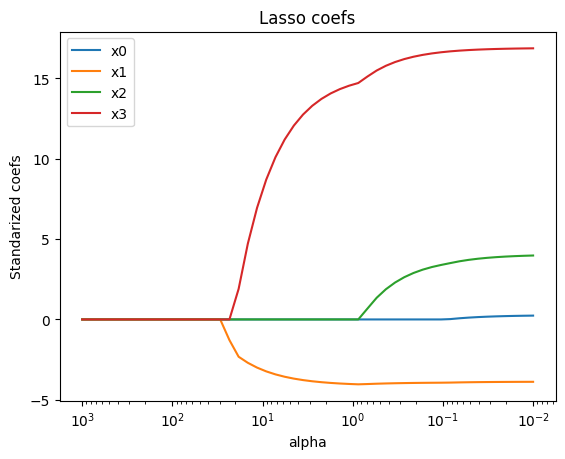

In [27]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#vairbales originales
x_variables = ['M', 'W', 'H', 'P']
y_variable = 'MR'

# numpy arrays para  (X) y (y)
X = df[x_variables].values
y = df[y_variable].values

# Supongamos que tienes un conjunto de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión Lasso
alpha = 1.0  # Este es el hiperparámetro de regularización
lasso_model = Lasso(alpha=alpha)

# Entrenar el modelo
lasso_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = lasso_model.predict(X_test)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")


X_train, x_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.8,random_state=42)

alphas = np.logspace(-2, 3, 50)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(X_train, y_train)
  coefs.append(lasso.coef_)

ax = plt.gca()

lineObjects = ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standarized coefs')
plt.title('Lasso coefs')
features = ['x' + str(feat) for feat in range(coefs[0].shape[0])]
ax.legend(iter(lineObjects), features)
plt.show()

Quiero empezar mi conclusión diciendo que quise hacer todo este ejercicio de 0 sin ver el codigo de ejemplo para ver si lo podía resolver yo sin copiar codigo y asi entenderlo mejor. Al principio pense que lo estaba haciendo mal por los valores de R^2, MSE y MAE, pero si analizamos las graficas de cada variable predictora vs la variable de respuesta podemos ver que no existe una gran correlacion entre las variables. La variable de respuesta no aumenta o cambia de manera apreciable conforme aumenta la variable predictora, esto sugiere que no hay una correlación lineal evidente entre las variables predictoras y la variable de respuesta. Esto es importante de tomar en cuenta.

Calculando R2, MSE y MAE, podemos ver que en resumen,  el modelo de regresión lineal no es muy efectivo para explicar la variabilidad en los asesinatos ("MR"). El bajo valor de R2 y los errores MSE y MAE relativamente altos indican que el modelo no está capturando adecuadamente las relaciones entre las variables predictoras y la variable de respuesta. Puede ser necesario explorar modelos más complejos o considerar la posibilidad de que las relaciones subyacentes sean no lineales.

Lo mismo pasa cuando le agregamos al conjunto de datos columnas que representen los cuadrados de las variables predictoras (por ejemplo, M2, W2), así como los productos entre pares de variables (por ejemplo, PxS, MxW). Los valores R2, MSE y MAE son similares

La regresión Ridge y Lasso son técnicas de regularización que ayudan a manejar problemas como la multicolinealidad y reducir la varianza del modelo, pero su capacidad para mejorar el rendimiento del modelo depende de la existencia de relaciones lineales entre las variables predictoras y la variable de respuesta. Si no hay una correlación lineal evidente entre estas variables, es menos probable que Ridge o Lasso proporcionen mejoras significativas. Es por eso que tampoco vimos much mejoría en estos modelos. Sin embargo si nos ayudo a analizar que la variable x3(P), y de menor manera la x2(H), son las mas relevantes para este modelo. Son las que más se alejaban de 0 en le parte de la derecha de la gráfica de Lasso y lo mismo pasaba en la gráfica de Lasso.


dicho todo esto, mi conclusión es que hubira sido mejor para los datos de criminalidad, el modelo cuadrático, dado que  no se observa una relación lineal evidente entre las variables predictoras y la variable de respuesta en tus datos.
